# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
USA_housing = pd.read_csv('USA_Housing.csv')
USA_housing.sample(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1545,64241.792229,5.328138,7.253737,6.01,27768.584555,9.445902e+05,"9425 Chad Ways Suite 792\nNorth Melissa, MD 26354"
1861,56647.882503,7.499318,7.903675,4.35,39780.927265,1.400268e+06,"2400 Davis Stravenue\nSouth Emily, AZ 87538"
4636,80134.338622,5.307020,7.197981,3.19,43751.179333,1.532645e+06,"86677 Michael Squares\nPort Bradley, CA 84127"


In [9]:
USA_housing.shape

(5000, 7)

In [4]:
USA_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USA_housing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
USA_housing.duplicated().sum()

0

In [7]:
USA_housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


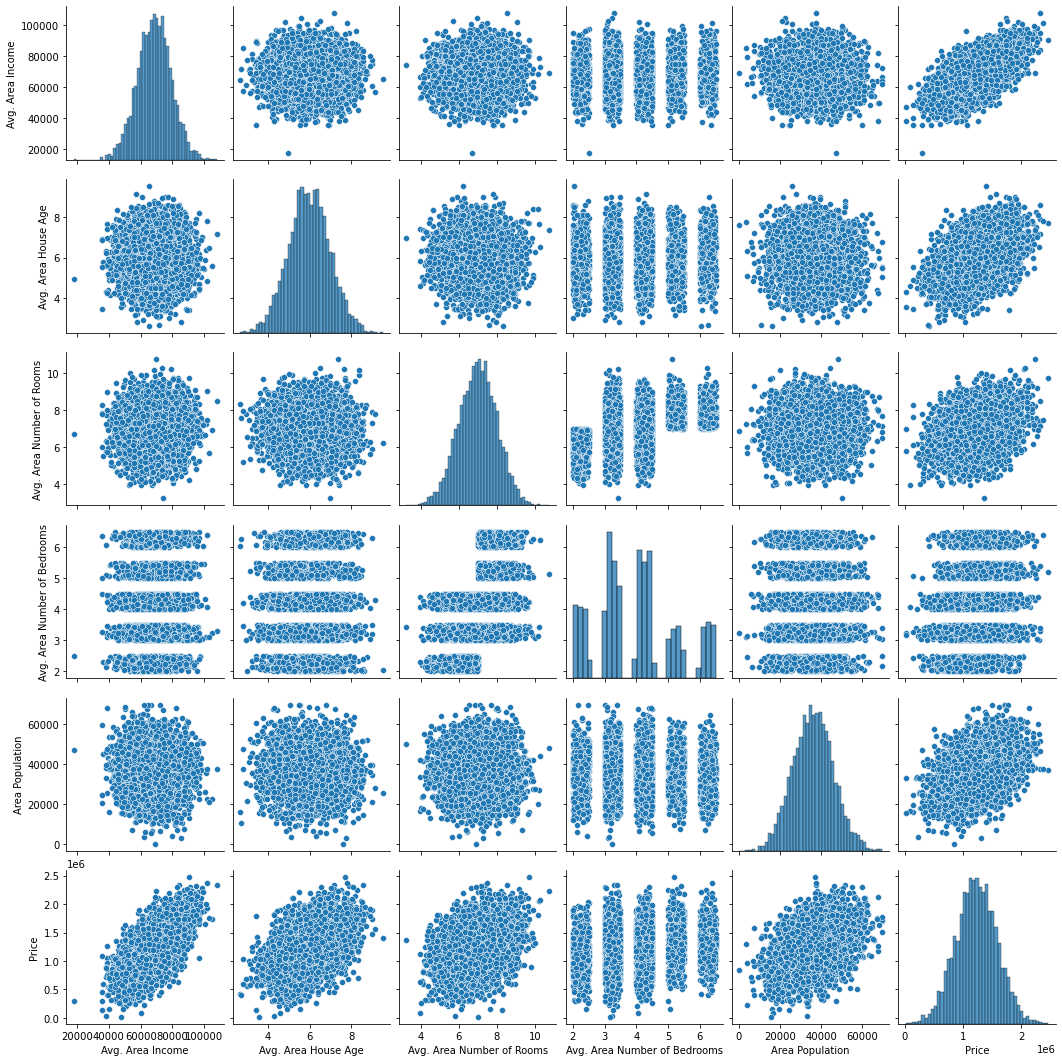

In [8]:
sns.pairplot(USA_housing)

<AxesSubplot:>

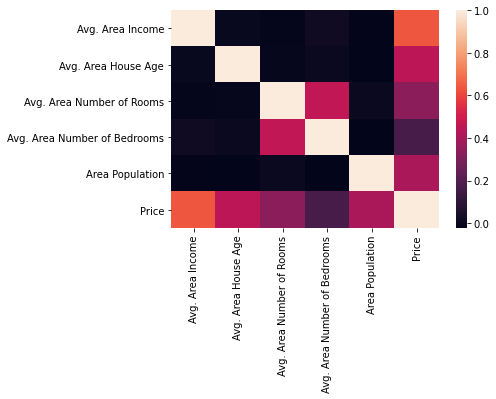

In [10]:
sns.heatmap(USA_housing.corr())

In [11]:
USA_housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

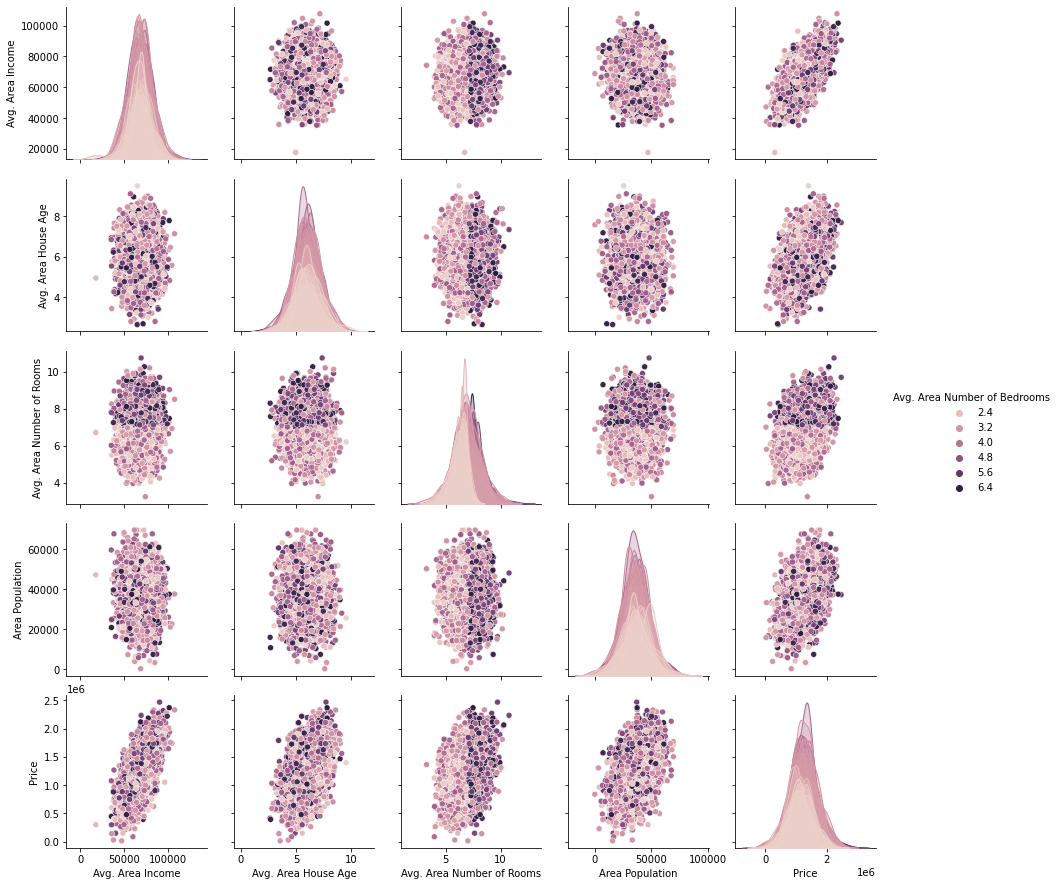

In [12]:
sns.pairplot(USA_housing, hue='Avg. Area Number of Bedrooms')

In [14]:
X = USA_housing[['Avg. Area Income']]
y = USA_housing[['Price']]

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
print(lm.intercept_)

[-227807.54684065]


In [46]:
print(lm.coef_)

[[21.28321534]]


In [47]:
pred = lm.predict(X_test)

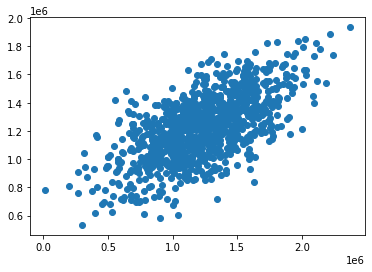

In [48]:
plt.scatter(y_test, pred)

# Model Evaluation

In [49]:
from sklearn import metrics

In [50]:
print('mae', metrics.mean_absolute_error(y_test, pred))
print('mse', metrics.mean_squared_error(y_test, pred))
print('rmse', np.sqrt(metrics.mean_squared_error(y_test, pred)))

mae 216061.92490300708
mse 73090359164.89066
rmse 270352.28714566235


In [60]:
x = USA_housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = USA_housing[['Price']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [61]:
print('Intercept;', lm2.intercept_)
print('Coefficients;', lm2.coef_)

Intercept; [-2635072.90093121]
Coefficients; [[2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
  1.52703134e+01]]


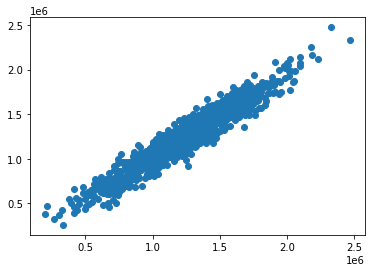

In [62]:
pred2 = lm2.predict(X_test)
plt.scatter(y_test, pred2)

In [63]:
print('mae', metrics.mean_absolute_error(y_test, pred2))
print('mse', metrics.mean_squared_error(y_test, pred2))
print('rmse', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

mae 80879.09723486961
mse 10089009300.89066
rmse 100444.06055556824


In [55]:
lm2

LinearRegression()